# Importing the libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

######  Imporing the Dataset

In [139]:
d=pd.read_csv('loan_data_train.csv')

In [140]:
d.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [141]:
d.describe()

,ID,Monthly.Income,Inquiries.in.the.Last.6.Months
count,2199.000000,2197.000000,2197.000000
mean,52024.256480,5727.459290,0.898498
std,30223.972207,4073.529708,1.219223
min,10.000000,588.500000,0.000000
25%,26361.500000,3458.000000,0.000000
50%,51302.000000,5000.000000,0.000000
75%,78386.500000,6883.330000,1.000000
max,104202.000000,102750.000000,9.000000


In [142]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
ID                                2199 non-null float64
Amount.Requested                  2199 non-null object
Amount.Funded.By.Investors        2199 non-null object
Interest.Rate                     2200 non-null object
Loan.Length                       2199 non-null object
Loan.Purpose                      2199 non-null object
Debt.To.Income.Ratio              2199 non-null object
State                             2199 non-null object
Home.Ownership                    2199 non-null object
Monthly.Income                    2197 non-null float64
FICO.Range                        2200 non-null object
Open.CREDIT.Lines                 2196 non-null object
Revolving.CREDIT.Balance          2197 non-null object
Inquiries.in.the.Last.6.Months    2197 non-null float64
Employment.Length                 2131 non-null object
dtypes: float64(3), object(12)
memory usage: 257.9+ KB


In [143]:
d.columns=['ID','Amount_requested','Amount_funded_by_investors','Interest_rate','Loan_length','Loan_purpose',
           'Debt_to_income_ratio','State','Home_ownership','Monthly_income','Fico_range','Open_credit_lines',
           'Revolving_credit_balance','Inquiries_in_last_6_months','Employment_length']

In [144]:
d.columns

Index(['ID', 'Amount_requested', 'Amount_funded_by_investors', 'Interest_rate',
       'Loan_length', 'Loan_purpose', 'Debt_to_income_ratio', 'State',
       'Home_ownership', 'Monthly_income', 'Fico_range', 'Open_credit_lines',
       'Revolving_credit_balance', 'Inquiries_in_last_6_months',
       'Employment_length'],
      dtype='object')

### Dropping the unwanted columns


In [145]:
d=d.drop(['ID','Amount_funded_by_investors'],axis=1)
d.head()

,Amount_requested,Interest_rate,Loan_length,Loan_purpose,Debt_to_income_ratio,State,Home_ownership,Monthly_income,Fico_range,Open_credit_lines,Revolving_credit_balance,Inquiries_in_last_6_months,Employment_length
0,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,24250,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


### Checking the number of null values in each column

In [146]:
d.isnull().sum()

Amount_requested               1
Interest_rate                  0
Loan_length                    1
Loan_purpose                   1
Debt_to_income_ratio           1
State                          1
Home_ownership                 1
Monthly_income                 3
Fico_range                     0
Open_credit_lines              4
Revolving_credit_balance       3
Inquiries_in_last_6_months     3
Employment_length             69
dtype: int64

### Replacing the  percentile symbol in Interest rate and Debt to income columns so as to convert them into continuous variables

In [147]:
for col in ['Interest_rate','Debt_to_income_ratio']:
    d[col]=d[col].str.replace('%','')

###  Converting the categorical values into numericals

In [148]:
for col in ['Amount_requested','Interest_rate','Debt_to_income_ratio','Open_credit_lines','Revolving_credit_balance']:
    d[col]=pd.to_numeric(d[col],errors='coerce')

### Converting the range into a number by taking the average

In [149]:
k=d['Fico_range'].str.split('-',expand=True).astype(float)
d['fico']=0.5*(k[0]+k[1])

del d['Fico_range']

### Checking the values in the Employent Length column

In [150]:
d['Employment_length'].value_counts()

10+ years    575
< 1 year     229
2 years      217
3 years      203
5 years      181
4 years      162
1 year       159
6 years      134
7 years      109
8 years       95
9 years       66
.              1
Name: Employment_length, dtype: int64

### Slicing the strings from the variables so as to convert them to numericals and converting them to numericals

In [151]:
d['Employment_length']=d['Employment_length'].str.replace('years','')
d['Employment_length']=d['Employment_length'].str.replace('year','')
d['Employment_length']=np.where(d['Employment_length'].str[:2]=='10',10,d['Employment_length'])
d['Employment_length']=np.where(d['Employment_length'].str[0]=='<',0,d['Employment_length'])
d['Employment_length']=pd.to_numeric(d['Employment_length'],errors='coerce')

### Selecting the columns which have objects as datatypes

In [152]:
cat_cols=d.select_dtypes(['object']).columns

In [153]:
cat_cols

Index(['Loan_length', 'Loan_purpose', 'State', 'Home_ownership'], dtype='object')

###  Replacing the null values with the required mean values

In [154]:
d['Debt_to_income_ratio'].fillna((d['Debt_to_income_ratio'].mean()),inplace=True)
d['Monthly_income'].fillna((d['Monthly_income'].mean()),inplace=True)
d['Revolving_credit_balance'].fillna((d['Revolving_credit_balance'].mean()),inplace=True)
d['Employment_length'].fillna((d['Employment_length'].mean()),inplace=True)
d['Amount_requested'].fillna((d['Amount_requested'].mean()),inplace=True)

### Converting the String values into numericals

In [155]:
d['Loan_length'].value_counts()

36 months    1722
60 months     476
.               1
Name: Loan_length, dtype: int64

In [156]:
d['Loan_length']=np.where(d['Loan_length'].str[:2]=='36',36,d['Loan_length'])
d['Loan_length']=np.where(d['Loan_length'].str[:2]=='60',60,d['Loan_length'])
d['Loan_length']=np.where(d['Loan_length'].str[0]=='.',36,d['Loan_length'])

### replacing the null values with their respective mode values

In [157]:
d['Loan_length'].fillna((36),inplace=True)
d['Loan_purpose'].fillna(('debt_consolidation'),inplace=True)
d['State'].fillna(method='ffill',inplace=True)
d['Home_ownership'].fillna(('MORTGAGE'),inplace=True)
d['Open_credit_lines'].fillna((8.0),inplace=True)
d['Inquiries_in_last_6_months'].fillna((0.0),inplace=True)

In [158]:
d.isnull().sum()

Amount_requested              0
Interest_rate                 0
Loan_length                   0
Loan_purpose                  0
Debt_to_income_ratio          0
State                         0
Home_ownership                0
Monthly_income                0
Open_credit_lines             0
Revolving_credit_balance      0
Inquiries_in_last_6_months    0
Employment_length             0
fico                          0
dtype: int64

### Converting the loan length column values which are objects into numericals

In [159]:
d['Loan_length']=pd.to_numeric(d['Loan_length'],errors='coerce')

In [160]:
d['Home_ownership']=d['Home_ownership'].str.replace('OTHER','MORTGAGE')
d['Home_ownership']=d['Home_ownership'].str.replace('NONE','MORTGAGE')

In [161]:
d['Home_ownership'].value_counts()

MORTGAGE    1024
RENT         999
OWN          177
Name: Home_ownership, dtype: int64

In [162]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 13 columns):
Amount_requested              2200 non-null float64
Interest_rate                 2200 non-null float64
Loan_length                   2200 non-null int64
Loan_purpose                  2200 non-null object
Debt_to_income_ratio          2200 non-null float64
State                         2200 non-null object
Home_ownership                2200 non-null object
Monthly_income                2200 non-null float64
Open_credit_lines             2200 non-null float64
Revolving_credit_balance      2200 non-null float64
Inquiries_in_last_6_months    2200 non-null float64
Employment_length             2200 non-null float64
fico                          2200 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 223.5+ KB


In [163]:
#pd.DataFrame(d).to_csv('D:/Loan_data_Tableau1.csv',index=False)

######  Performing One-Hot Encoding so as to convert columns with categorical variables into continuous variables

In [164]:
a=pd.get_dummies(d['Loan_purpose'],prefix='Purpose',drop_first=True)
b=pd.get_dummies(d['State'],prefix='State',drop_first=True)
c=pd.get_dummies(d['Home_ownership'],prefix='Ownership',drop_first=True)


#### Concatenating the columns with the original dataset

In [165]:
d=pd.concat((d,a),axis=1)
d=pd.concat((d,b),axis=1)
d=pd.concat((d,c),axis=1)

In [166]:
print(d.isnull().sum())

Amount_requested              0
Interest_rate                 0
Loan_length                   0
Loan_purpose                  0
Debt_to_income_ratio          0
State                         0
Home_ownership                0
Monthly_income                0
Open_credit_lines             0
Revolving_credit_balance      0
Inquiries_in_last_6_months    0
Employment_length             0
fico                          0
Purpose_credit_card           0
Purpose_debt_consolidation    0
Purpose_educational           0
Purpose_home_improvement      0
Purpose_house                 0
Purpose_major_purchase        0
Purpose_medical               0
Purpose_moving                0
Purpose_other                 0
Purpose_renewable_energy      0
Purpose_small_business        0
Purpose_vacation              0
Purpose_wedding               0
State_AK                      0
State_AL                      0
State_AR                      0
State_AZ                      0
                             ..
State_MA

In [167]:
d.shape

(2200, 73)

### Importing train_test_split 

In [168]:
from sklearn.model_selection import  train_test_split

### Import Linear Regression

In [169]:
from sklearn.linear_model import LinearRegression

### Selecting the x variables and target variable

In [175]:
x=d.drop(['Interest_rate','Loan_purpose','State','Home_ownership'],axis=1)
y=d['Interest_rate']

### Splitting the train data and test data into 70% and 30% respectively

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

### Fitting the Linear Regression Model

In [178]:
LR=LinearRegression()
model=LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [179]:
LR.score(x_test,y_test)

0.7548233431613258

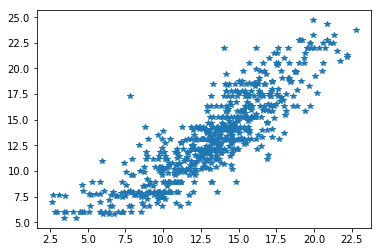

In [180]:
plt.plot(y_pred,y_test,"*")

In [181]:
from sklearn import metrics

###  Calculating Mean Squared Error

In [182]:
mse=metrics.mean_squared_error(y_test,y_pred)
mse


4.2044046464301

### Calculating Mean Squared Error

In [183]:
rmse=np.sqrt(mse)
rmse

2.050464495286397

### Ridge Regression

In [185]:
from sklearn.linear_model import Ridge

In [186]:
R=Ridge()
model=R.fit(x_train,y_train)
y_pred=R.predict(x_test)

In [187]:
R.score(x_test,y_test)

0.7569455995241499

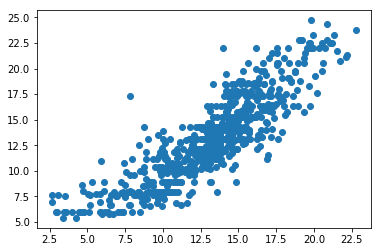

In [188]:
plt.scatter(y_pred,y_test)

In [189]:
mse=metrics.mean_squared_error(y_test,y_pred)
mse


4.168011195977577

In [190]:
rmse=np.sqrt(mse)
rmse

2.041570766830672

### Lasso Regression

In [191]:
from sklearn.linear_model import Lasso

In [192]:
L=Lasso()
model=L.fit(x_train,y_train)
y_pred=L.predict(x_test)

In [193]:
L.score(x_test,y_test)

0.750384304311237

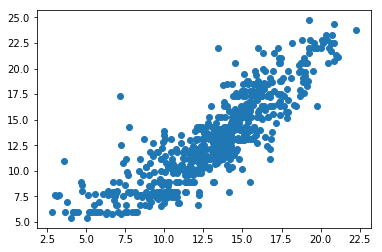

In [194]:
plt.scatter(y_pred,y_test)